**RETAIL SALES DATA SET**

The analysis lead to clear recommednation that can be used to improve overall business strategy and customer targetry

**1.Data Upload and Loading**

This code uploads a dataset from the user's local system using Google Colab's file upload feature and loads it into a Pandas DataFrame. It then prints the dataset's name and confirms successful loading.

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
print("Please upload the dataset file.")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)
print(f"\nDataset '{file_name}' loaded successfully!")




Please upload the dataset file.


Saving retail_sales_dataset.csv to retail_sales_dataset.csv

Dataset 'retail_sales_dataset.csv' loaded successfully!


**2.Data Exploration and cleaning**


This code explores the dataset by displaying its shape (rows and columns), a preview of the first few rows, and summary statistics for numeric columns. It also checks for missing data in the dataset by counting null values in each column.








In [ ]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Display the first few rows of the dataset
print("\nPreview of the dataset:")
print(data.head())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe())

# Checking for missing data
print("\nChecking for Missing Data:")
missing_data = data.isnull().sum()
print(missing_data)



Shape of the dataset:
Rows: 1000, Columns: 9

Preview of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Summary Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2

**Handling Missing Values**

This code handles missing values in the dataset by removing any rows that contain NaN values. It ensures that the dataset is clean and does not contain any missing or incomplete data.








In [ ]:
#Handling missing values if any
data = data .dropna()

**Display Column Names**

This code displays the names of all the columns in the dataset. It helps the user to quickly understand the structure and available features in the dataset.








In [ ]:
# Display the column names
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


**Accessing Row by Integer Index**

This code accesses and displays the first row of the dataset using its integer index (0). It allows the user to view the data of a specific row based on its position in the DataFrame.

In [ ]:
#Acessing row by integer index
print(data.iloc[0])

Transaction ID                        1
Date                2023-11-24 00:00:00
Customer ID                     CUST001
Gender                             Male
Age                                  34
Product Category                 Beauty
Quantity                              3
Price per Unit                       50
Total Amount                        150
Name: 0, dtype: object


In [ ]:
#Acessing column by integer index
print(data.loc[0])

Transaction ID                        1
Date                2023-11-24 00:00:00
Customer ID                     CUST001
Gender                             Male
Age                                  34
Product Category                 Beauty
Quantity                              3
Price per Unit                       50
Total Amount                        150
Name: 0, dtype: object


### **3.Visualization**
**SEABORN LIBRARY:Pairplot Visualization**


This code generates a pairplot (scatterplot matrix) for selected columns in the dataset to visualize relationships between multiple numerical variables. It helps identify patterns, correlations, and distributions of the chosen features.

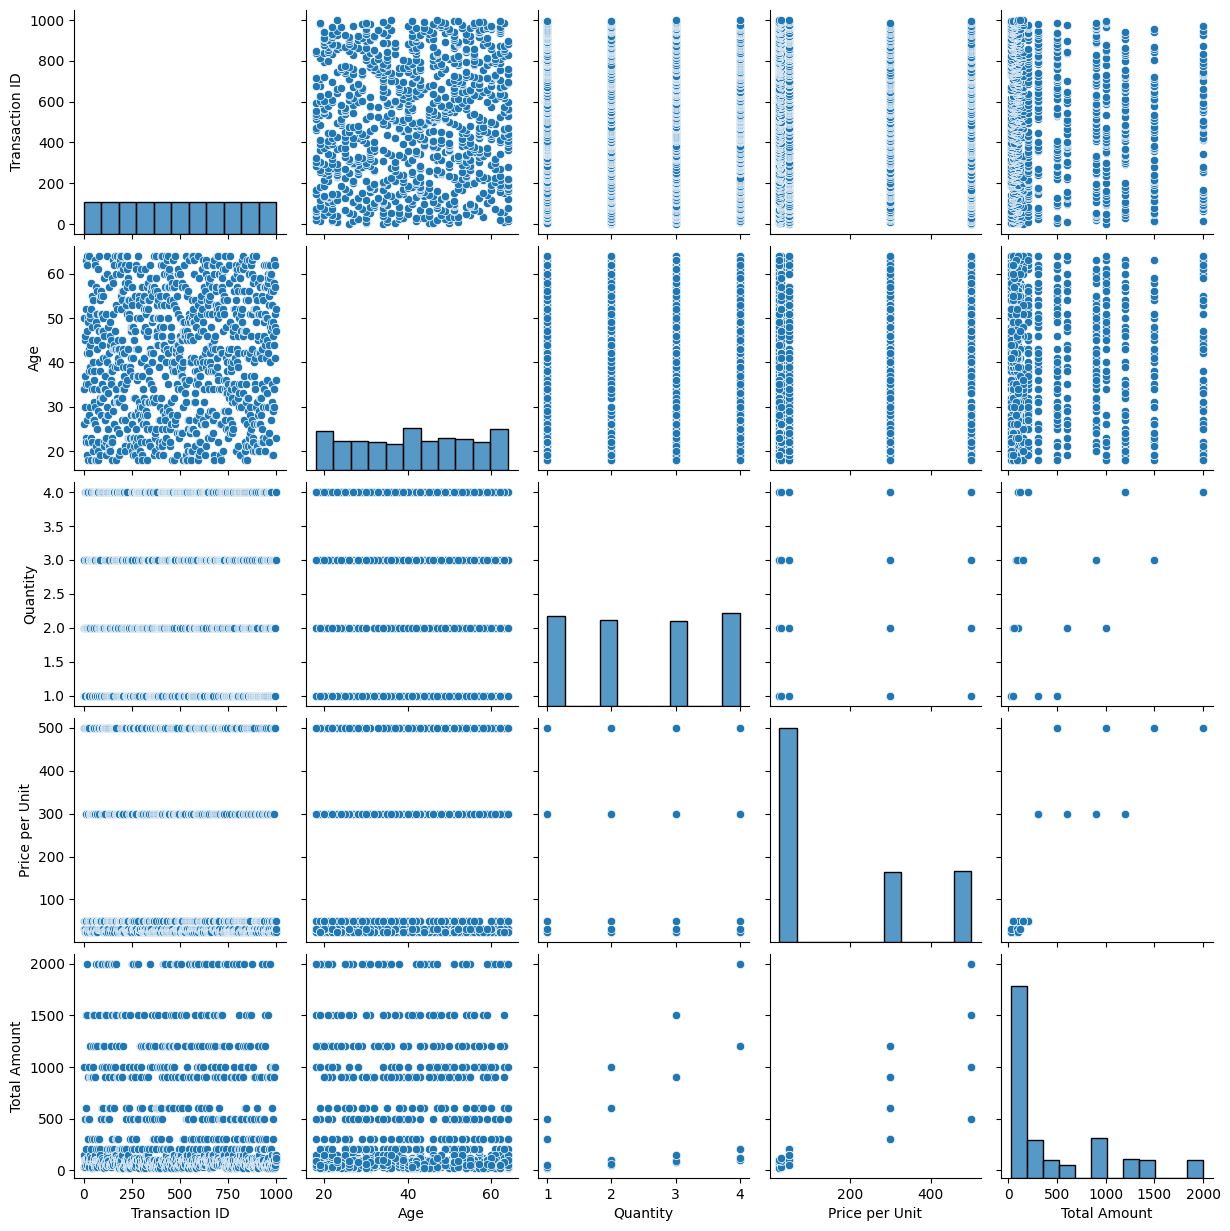

In [ ]:
sns.pairplot(data[['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']])
plt.show()

###  **SEABORN LIBRARY:Heatmap**
This code computes the correlation matrix for numeric columns in the dataset and visualizes it as a heatmap using Seaborn. It helps identify correlations between variables, with stronger correlations shown in darker colors, and annotates the correlation values within the heatmap.

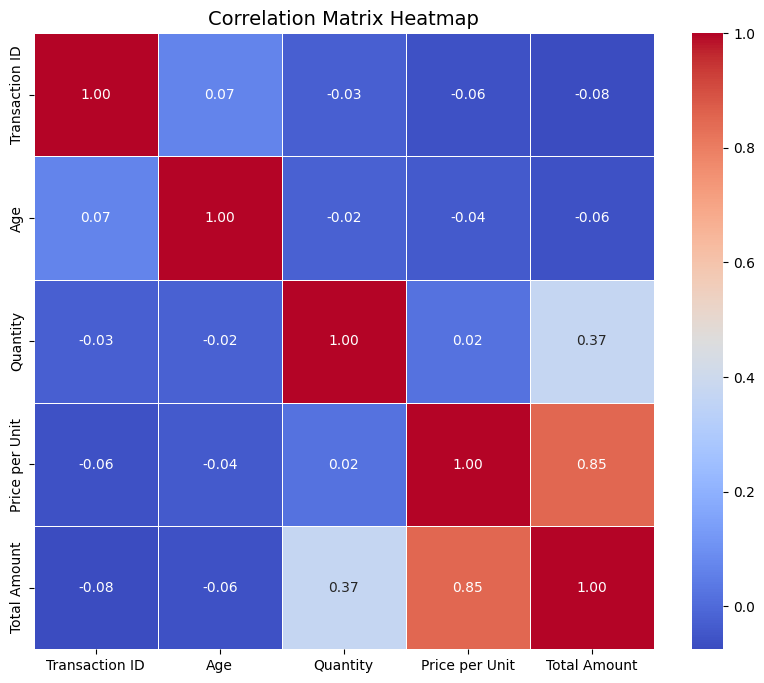

In [ ]:
# Heatmap: Correlation Matrix (Fixed)
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()



### **SEABORN LIBRARY:Gender Distribution Visualization**

This code calculates the gender distribution by counting the occurrences of each gender in the dataset. It then visualizes the distribution using a bar plot, displaying the count of male and female customers in the dataset.


Gender Distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64


<ipython-input-12-9244556f22e8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="coolwarm")


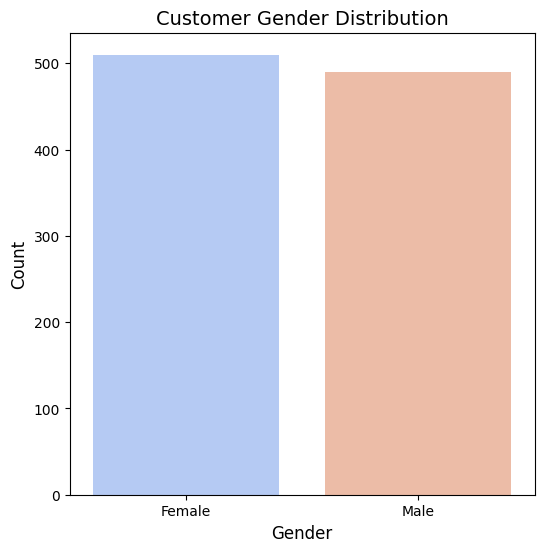

In [ ]:
# Gender distribution
gender_distribution = data['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)

# Visualization: Gender distribution
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="coolwarm")
plt.title('Customer Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### **SEABORN LIBRARY:Histogram**


This code provides a statistical summary of the 'Age' column using `describe()`, and then visualizes the age distribution of customers using a histogram. The histogram includes a Kernel Density Estimate (KDE) to show the distribution shape and frequency of customer ages.


Age Distribution:
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


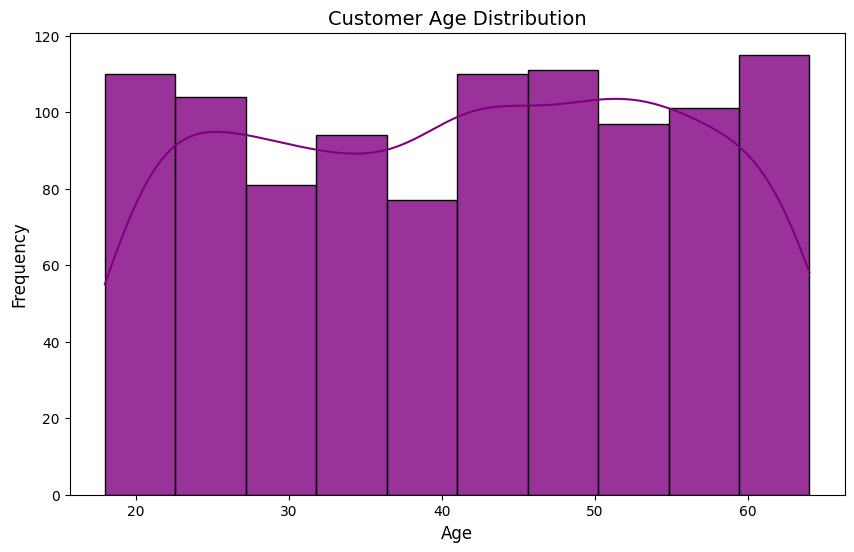

In [ ]:
# Age distribution
age_distribution = data['Age'].describe()
print("\nAge Distribution:")
print(age_distribution)

# Visualization: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='purple', alpha=0.8)
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


###  **MATPLOT LIB:Pie Chart**

This code first checks if the 'Gender' column exists in the dataset, then calculates the gender distribution and visualizes it using a pie chart. The pie chart shows the proportion of different genders, with percentages displayed for each category.

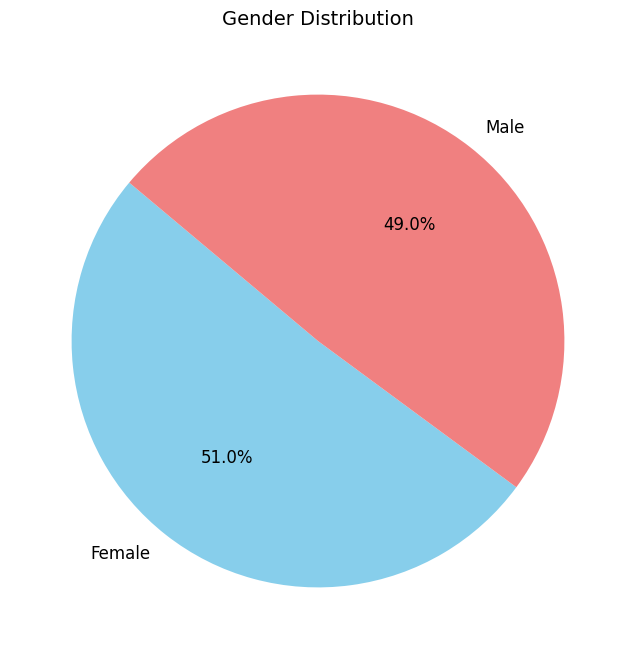

In [ ]:
# Verify that the Gender column exists
if 'Gender' in data.columns:
    # Count gender occurrences
    gender_distribution = data['Gender'].value_counts()

    # Plot Pie Chart: Gender Distribution
    plt.figure(figsize=(8, 8))
    gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], fontsize=12)
    plt.title('Gender Distribution', fontsize=14)
    plt.ylabel('')  # Hide the y-axis label
    plt.show()
else:
    print("Error: 'Gender' column not found in the dataset.")


###  **SEABORN LIBRARY:Scatter Plot**


This code creates a scatter plot to visualize the relationship between 'Age' and 'Total Amount'. It uses different colors to represent 'Gender' and allows for a clear comparison of how total amounts vary with age, with gender distinctions shown through color.

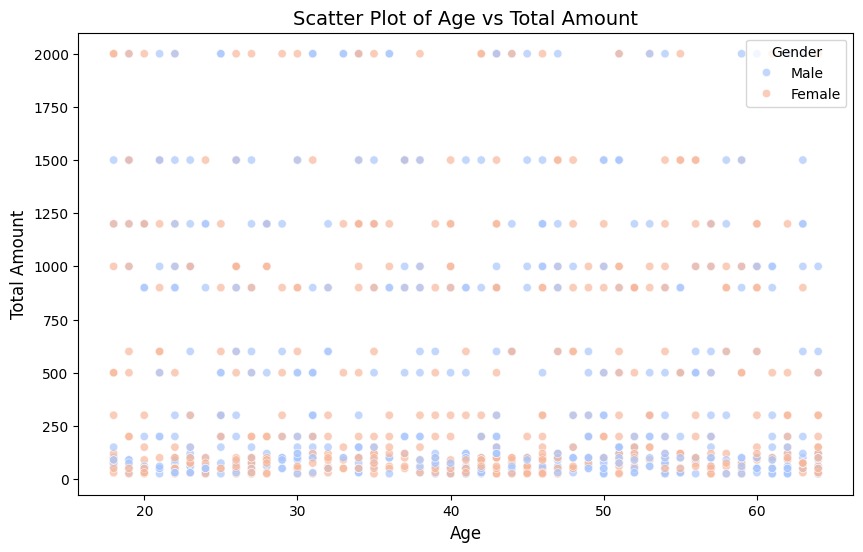

In [ ]:
# Scatter Plot: Age vs Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=data, hue='Gender', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Age vs Total Amount', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.legend(title='Gender')
plt.show()


**MATPLOT LIB:Violin Plot**

This code generates a violin plot to visualize the distribution of ages across different genders. The plot shows the density of the age distribution for each gender, with the shape indicating the distribution's spread and central tendency.

<ipython-input-13-044a46bdb999>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=data, palette='muted', split=True)


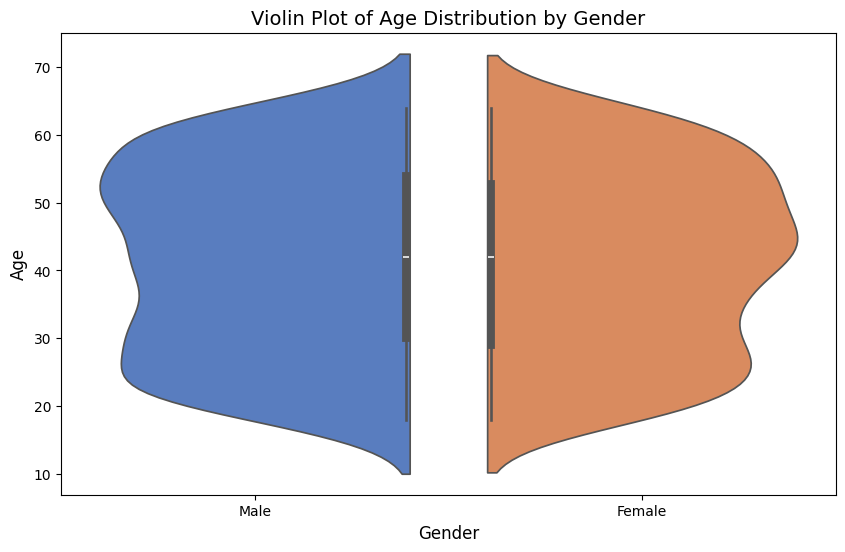

In [ ]:
# Violin Plot: Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=data, palette='muted', split=True)
plt.title('Violin Plot of Age Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


 **Revenue by Product Category Visualization**

This code calculates the total revenue for each product category by grouping the data and summing the 'Total Amount' for each category. It then visualizes the revenue distribution across different product categories using a bar plot, highlighting the categories with the highest revenue.


Revenue by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


<ipython-input-7-8d49d8a555ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="Blues_d")


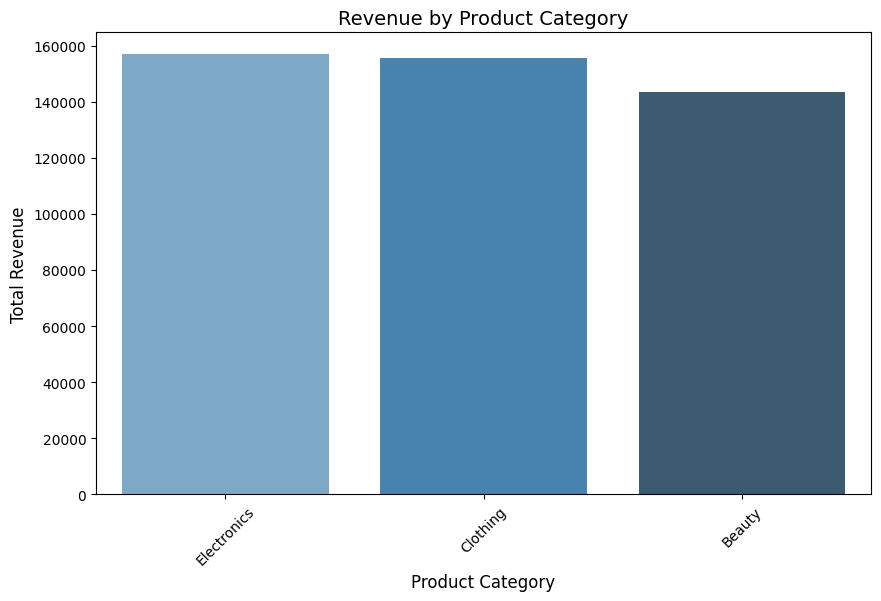

In [ ]:
# Revenue contribution by product category
revenue_by_category = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(revenue_by_category)

# Visualization: Revenue by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="Blues_d")
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


###  **Box Plot: Total Amount by Product Category**

This code generates a box plot to visualize the distribution of 'Total Amount' across different 'Product Category' values. The box plot highlights the median, quartiles, and potential outliers in the total amount for each product category.

<ipython-input-9-08cbfb32bd87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Total Amount', data=data, palette='Set2')


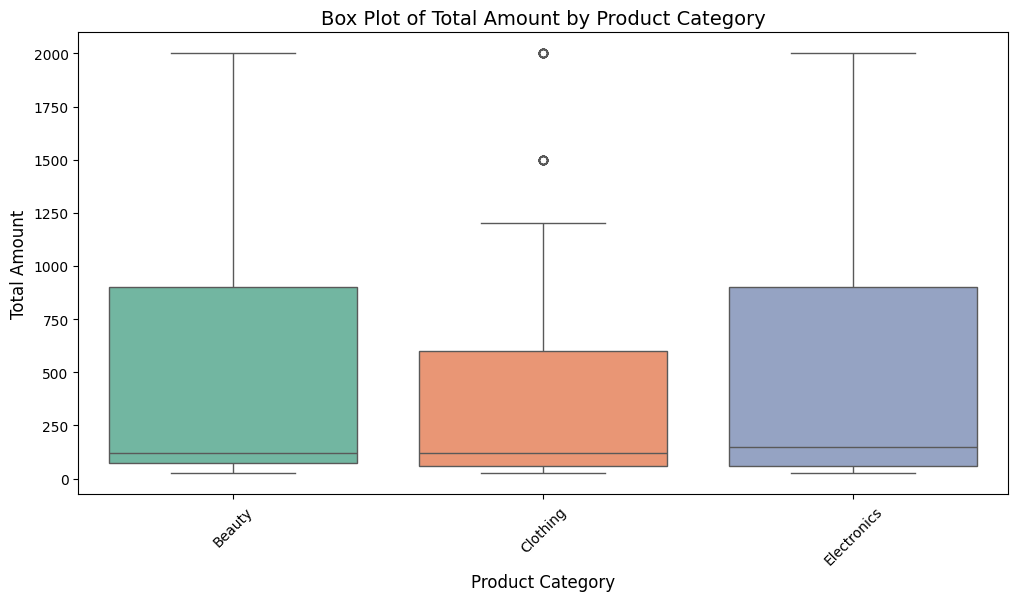

In [ ]:
# Box Plot: Total Amount by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Total Amount', data=data, palette='Set2')
plt.title('Box Plot of Total Amount by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### **Monthly Revenue Trends Visualization**
This code converts the 'Date' column to a datetime format, then groups the data by month to calculate the total revenue for each month. It visualizes the monthly revenue trends using a line plot, showing how revenue fluctuates over time.

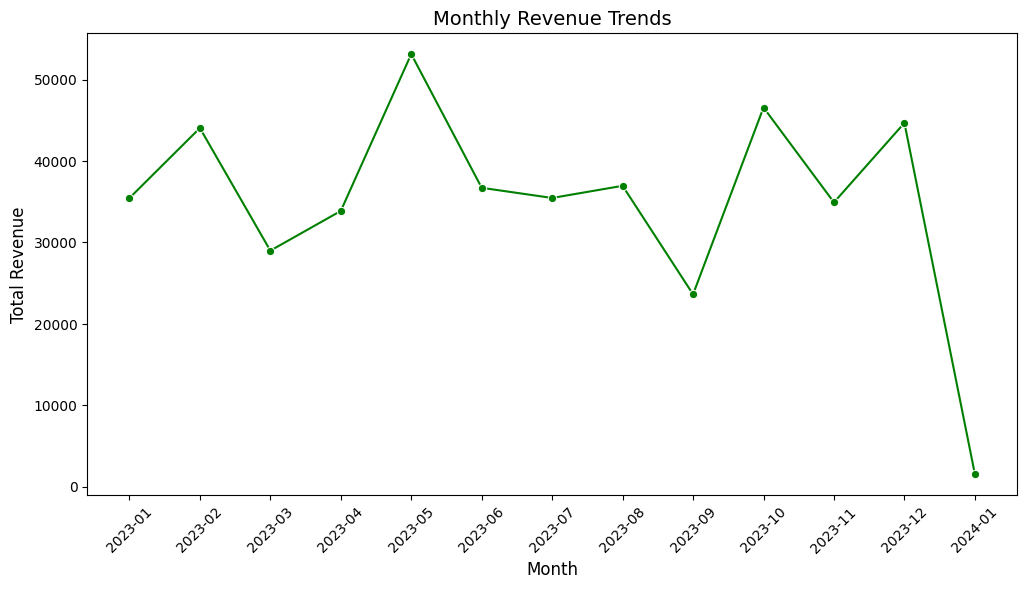

In [ ]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by month and calculate total revenue
monthly_revenue = data.groupby(data['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index()
monthly_revenue['Date'] = monthly_revenue['Date'].astype(str)

# Visualization: Monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=monthly_revenue, marker='o', color='green')
plt.title('Monthly Revenue Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Line Plot: Total Quantity Sold Over Time**

This line plot will show the trend of the total quantity sold over time, providing insight into how sales have changed.

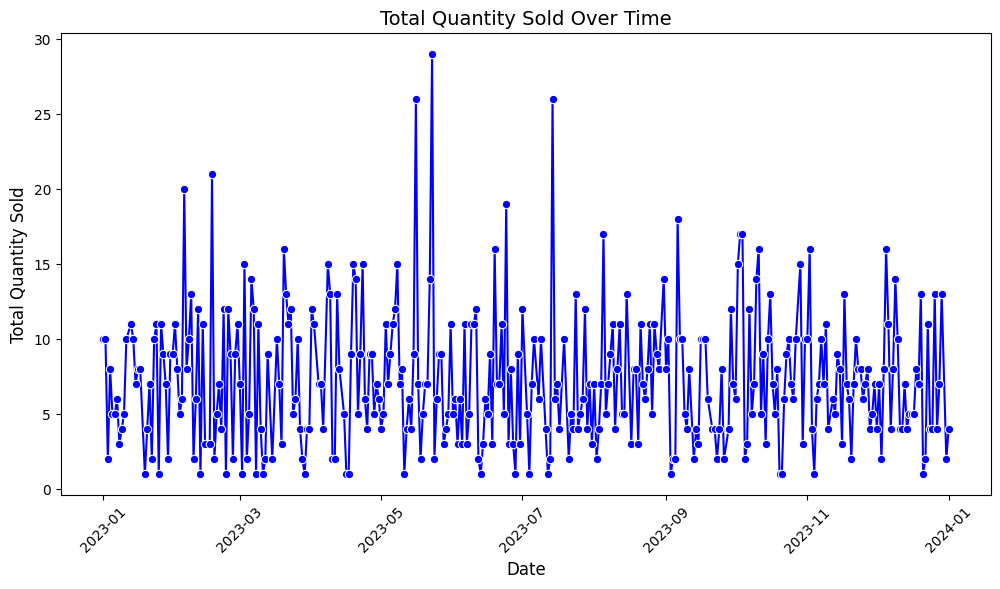

In [ ]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop any rows with missing dates
data = data.dropna(subset=['Date'])

# Group by Date and calculate total quantity sold
daily_quantity = data.groupby(data['Date'].dt.date)['Quantity'].sum().reset_index()

# Line plot for Total Quantity Sold Over Time
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x=daily_quantity['Date'], y=daily_quantity['Quantity'], color='blue', marker='o')  # Create the line plot
plt.title('Total Quantity Sold Over Time', fontsize=14)  # Title of the plot
plt.xlabel('Date', fontsize=12)  # Label for the x-axis
plt.ylabel('Total Quantity Sold', fontsize=12)  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.show()  # Display the plot




**Stacked Bar Plot: Revenue by Product Category and Gender**
This stacked bar plot shows revenue for each product category broken down by gender. It helps to see how different genders contribute to revenue in each category.



<Figure size 1200x600 with 0 Axes>

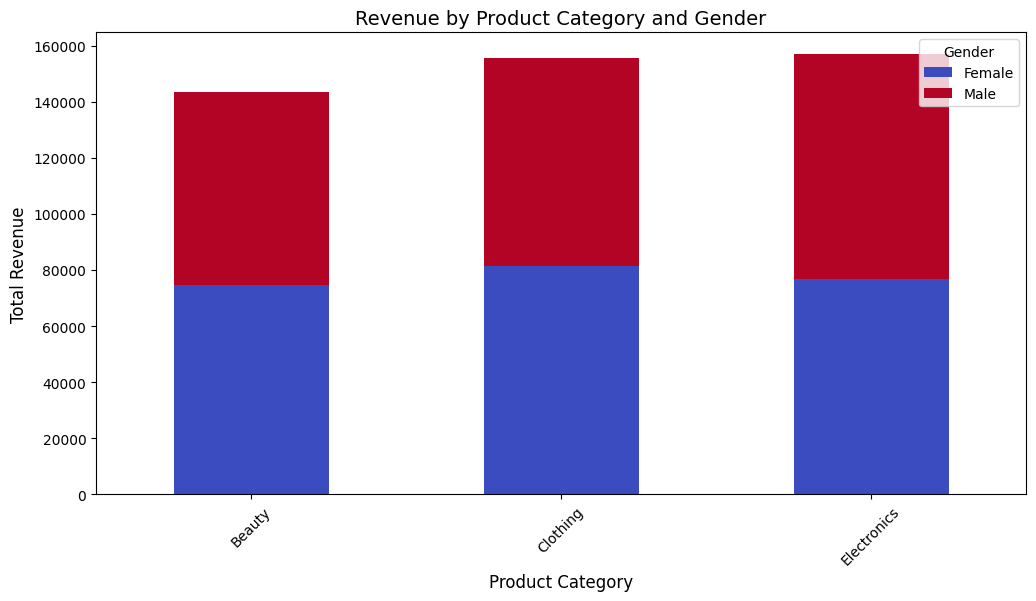

In [ ]:
# Group by Product Category and Gender and calculate total revenue
revenue_by_category_gender = data.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# Stacked bar plot for Revenue by Product Category and Gender
plt.figure(figsize=(12, 6))
revenue_by_category_gender.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Revenue by Product Category and Gender', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Conclusion:  

1. **Data Cleaning:** Handled missing values and converted the 'Date' column to datetime format for analysis.  
2. **EDA:** Explored gender, age, and product distributions to understand customer behavior.  
3. **Correlation Analysis:** Identified relationships between numerical features using a heatmap.  
4. **Feature Importance:** Highlighted 'Product Category' and 'Date' as critical for revenue generation.  
5. **Product Insights:** Electronics and Clothing are top performers; Beauty needs targeted strategies.  
6. **Customer Targeting:** Focused on the 29-53 age group and female customers for better engagement.  
7. **Revenue Trends:** Seasonal patterns identified for optimizing inventory and promotions.  
8. **Result:** Provided actionable recommendations for product focus and customer targeting.  